In [1]:
# import packages

import pickle, pprint
import numpy as np
import collections
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data

pkl_file = open('zo1_graph_timelapse_sample_v2.pkl','rb')
data1 = pickle.load(pkl_file)

# Load data structure at specified time

In [2]:
#Time step , checked - > t = 12, cut = 4, t=21, cut = 30
# Bad ones - 7, 16, 20, 21, 28, 29, 30 at cutoff = 1
# Checked - 28 -> cutoff = 40 , 29 diffuclt, 
# 20 is a good example for small cell healing stuff
t = 1
V = data(data1, t)

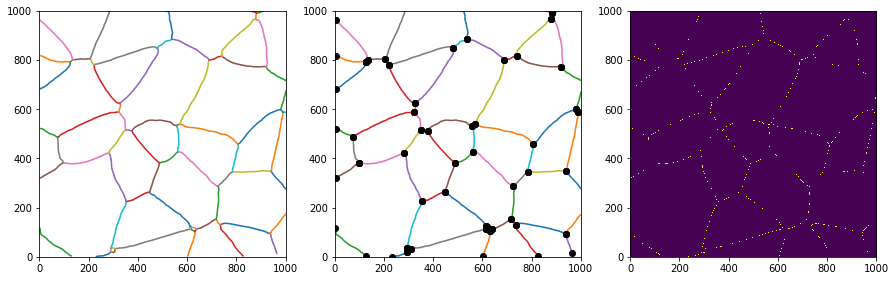

In [3]:
# Plot 
import matplotlib.pyplot as plt
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,5))
V.plot(ax, "edge", None)
V.plot(ax1, "edge_and_node", None)
V.plot(ax2, "image", None)

# Clean up overlapping nodes within small cutoff

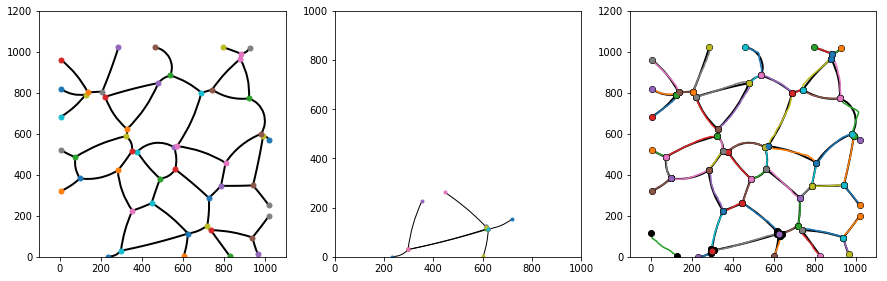

In [4]:
# Cutoff
cutoff = 1
nodes, edges, new_edges = V.post_processing(cutoff, None)
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,5))

edges = [e for e in edges if e.radius is not None]

[e.plot(ax1) for e in new_edges]
[n.plot(ax1) for e in new_edges for n in e.nodes]

V.plot(ax2, "edge_and_node", None)
ax1.set(xlim = [0,1000], ylim = [0,1000], aspect = 1)
for a in (ax, ax2):
    a.set(xlim = [0,300], ylim = [400,600], aspect = 1)
#    a.set(xlim = [140,170], ylim = [400,420], aspect = 1)
    a.set(xlim = [-100,1100], ylim = [0,1200], aspect = 1)
    [e.plot(a, lw = 2 ) for e in edges]
    [n.plot(a, markersize = 10) for n in nodes]


In [5]:
# Check repeats
print([item for item, count in collections.Counter(nodes).items() if count > 1])
print([item for item, count in collections.Counter(edges).items() if count > 1])

[]
[]


# Compute tensions and pressures

In [6]:
import numpy.linalg as la

col1, tensions, pressures, P_T, P_P, A, B = V.compute(cutoff)

print('Number of edges:',len(col1.tot_edges))
print('Number of nodes:',len(col1.tot_nodes))
print('\n')
print('Condition number of tension matrix A:',la.cond(A))
print('Condition number of pressure matrix B:',la.cond(B))
print('Mean value of tension:',np.mean(tensions))
if pressures is not None:
    print('Mean value of pressure:',np.mean(pressures))


     fun: 0.57247867361574
     jac: array([0.01867373, 0.01832764, 0.0183375 , 0.01854108, 0.01800323,
       0.01858336, 0.01857165, 0.01844512, 0.01835547, 0.0188113 ,
       0.01860236, 0.01850792, 0.01790839, 0.01858454, 0.01802852,
       0.01835211, 0.01808514, 0.01843765, 0.01872748, 0.01804501,
       0.01870749, 0.01846828, 0.01853593, 0.01851154, 0.01842219,
       0.01920179, 0.01840818, 0.01840678, 0.01805134, 0.01835668,
       0.01838085, 0.01840682, 0.01881902, 0.01843163, 0.01872946,
       0.01826739, 0.01819521, 0.01806058, 0.01845739, 0.0184745 ,
       0.01859327, 0.01867425, 0.01844591, 0.01814141, 0.01890752,
       0.01859275, 0.01866806, 0.01834692, 0.01846591, 0.01880185,
       0.01832936, 0.01896379, 0.01799913, 0.01822042, 0.01844474,
       0.01849771, 0.01860929, 0.01859317, 0.01849463, 0.01891398,
       0.01861519, 0.01851476])
 message: 'Optimization terminated successfully.'
    nfev: 2982
     nit: 46
    njev: 46
  status: 0
 success: True
       x:

In [7]:
print([e.tension for e in col1.edges])
print([e.pressure for e in col1.cells])

[1.108664552011811, 0.9186286485807945, 1.1084179506564038, 1.252059177126731, 2.9112450324657586, 0.969578094810659, 0.6634172526988388, 0.5778779372374226, 0.2811032228626854, 0.7684838466956775, 1.0746507974926638, 0.5144765922533399, 0.3614361398589125, 0.36356721082997406, 0.3759238037376604, 0.5958140944374111, 1.0698299097484336, 1.0755974122995264, 2.4578953333456908, 2.379539306799951, 2.7985369773644555, 2.1012361894350784, 0.6884959565006853, 0.99027529835189, 1.4650939558314324, 1.2154542454852675, 2.122603545847966, 0.5886466446499491, 0.5640794179175564, 0.8311579349137982, 1.7891625852068263, 0.5682173709171312, 0.41236707481853924, 0.5228479714303323, 1.2470841035175655, 1.054525696706786, 0.8392195704193931, 0.4832538541986872, 0.8509093037876734]
[[0.003959982836244605], [-0.002765380916989001], [-0.0021961506370997592], [0.0014353133516948344], [0.018082787427287184], [-0.003208275616408168], [-0.003278471043546608], [-0.004803911899854291], [-0.005692323432442554], 

In [ ]:
# import packages

import pickle, pprint
import numpy as np
import collections
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data

pkl_file = open('zo1_graph_timelapse_sample_v2.pkl','rb')
data1 = pickle.load(pkl_file)

# Load data structure at specified time

#Time step , checked - > t = 12, cut = 4, t=21, cut = 30
# Bad ones - 7, 16, 20, 21, 28, 29, 30 at cutoff = 1
# Checked - 28 -> cutoff = 40 , 29 diffuclt, 
# 20 is a good example for small cell healing stuff
t = 1
V = data(data1, t)

# Plot 
import matplotlib.pyplot as plt
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,5))
V.plot(ax, "edge", None)
V.plot(ax1, "edge_and_node", None)
V.plot(ax2, "image", None)

# Clean up overlapping nodes within small cutoff

# Cutoff
cutoff = 1
nodes, edges, new_edges = V.post_processing(cutoff, None)
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,5))

edges = [e for e in edges if e.radius is not None]

[e.plot(ax1) for e in new_edges]
[n.plot(ax1) for e in new_edges for n in e.nodes]

V.plot(ax2, "edge_and_node", None)
ax1.set(xlim = [0,1000], ylim = [0,1000], aspect = 1)
for a in (ax, ax2):
    a.set(xlim = [0,300], ylim = [400,600], aspect = 1)
#    a.set(xlim = [140,170], ylim = [400,420], aspect = 1)
    a.set(xlim = [-100,1100], ylim = [0,1200], aspect = 1)
    [e.plot(a, lw = 2 ) for e in edges]
    [n.plot(a, markersize = 10) for n in nodes]


# Check repeats
print([item for item, count in collections.Counter(nodes).items() if count > 1])
print([item for item, count in collections.Counter(edges).items() if count > 1])

print([len(n.edges) for n in nodes])

[set(n.edges) for n in nodes if len(n.edges) == 2][0]

fig, ax = plt.subplots(1,1)
ax.set(xlim = [0,1100], ylim  = [0,1000], aspect = 1)
[e.plot(ax) for e in edges[19:20]]
plt.show()

edges[19].radius

# Compute tensions and pressures

import numpy.linalg as la

col1, tensions, pressures, P_T, P_P, A, B = V.compute(cutoff)

print('Number of edges:',len(col1.tot_edges))
print('Number of nodes:',len(col1.tot_nodes))
print('\n')
print('Condition number of tension matrix A:',la.cond(A))
print('Condition number of tension matrix P_T:',la.cond(P_T))
print('Condition number of pressure matrix B:',la.cond(B))
print('Condition number of pressure matrix P_P:',la.cond(P_P))
print('Mean value of tension:',np.mean(tensions))
if pressures is not None:
    print('Mean value of pressure:',np.mean(pressures))


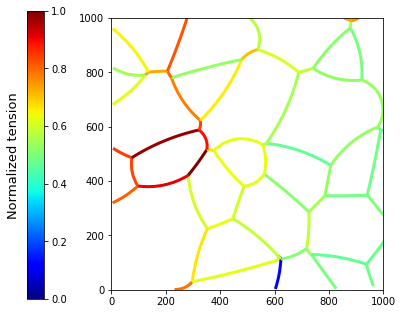

In [8]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_tensions(ax, fig, tensions)

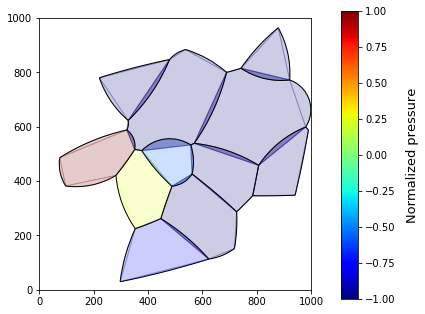

In [10]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))

#col1.plot(ax, fig, tensions, pressures )
col1.plot_pressures(ax, fig, pressures )
[e.plot(ax) for e in col1.edges]
plt.show()

In [9]:
B

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
rhs

array([[1.],
       [1.],
       [1.],
       [1.]])

In [11]:
B - rhs

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.]])